# Titanic Death Prediction

## Data exploration , Preprocessing and cleaning

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading Dataset

df = pd.read_csv('train.csv')

In [3]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.shape

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Histograms

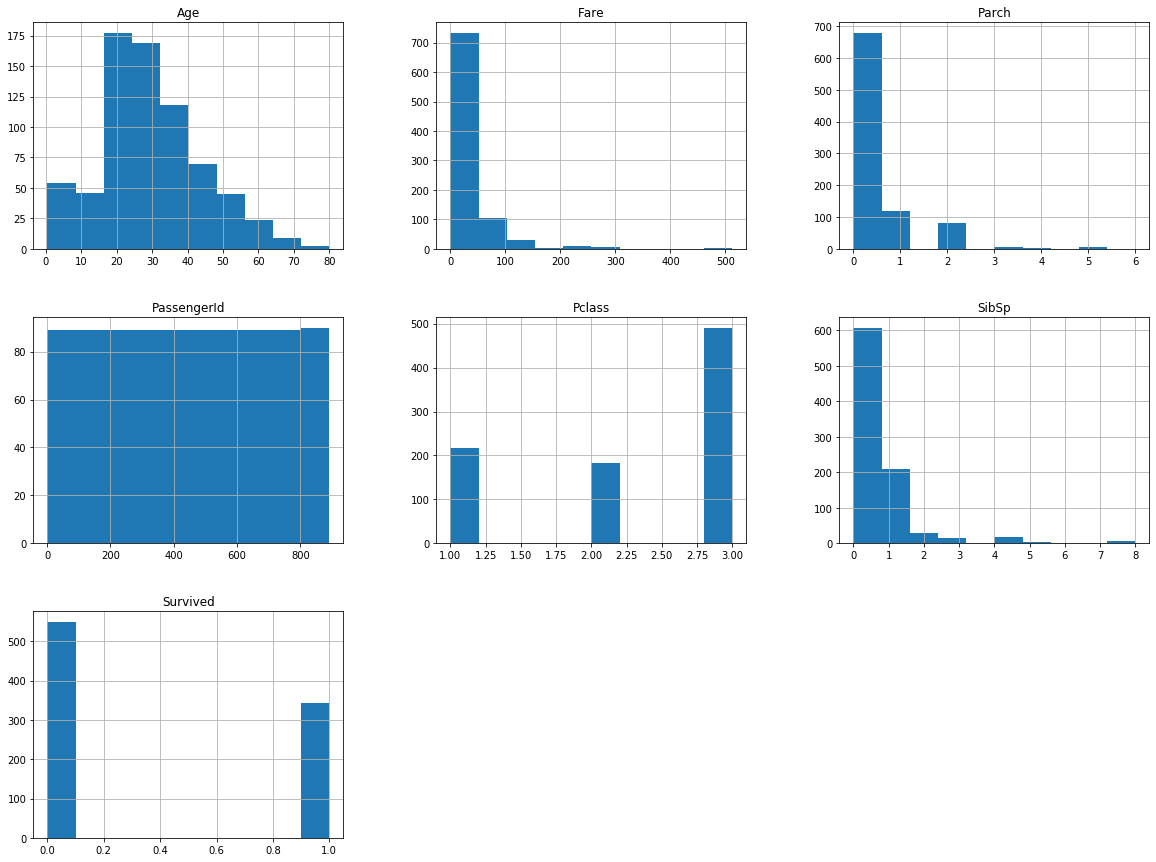

In [8]:
df.hist(figsize=(20,15))
plt.show()

### Box plots

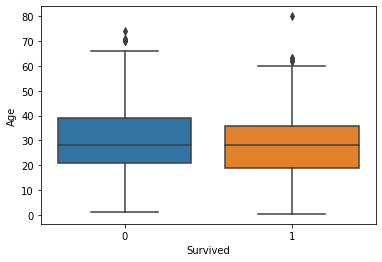

In [9]:
sns.boxplot(x='Survived',y='Age',data=df)

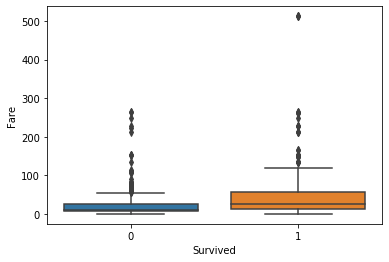

In [10]:
sns.boxplot(x='Survived',y='Fare',data=df)

### Bar plots

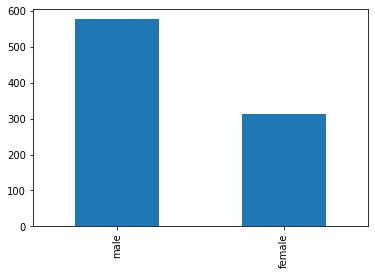

In [11]:
df.Sex.value_counts().plot.bar()

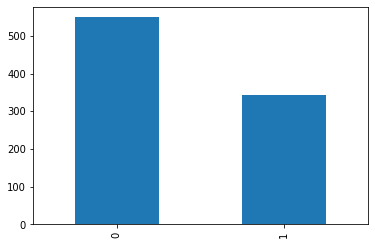

In [12]:
df.Survived.value_counts().plot.bar()

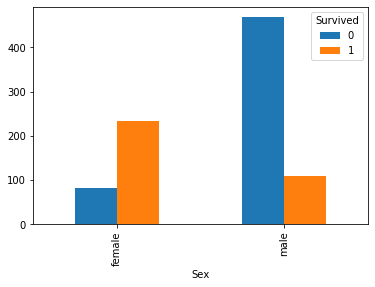

In [13]:
pd.crosstab(df.Sex,df.Survived).plot.bar()

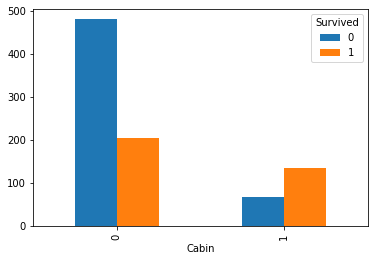

In [14]:
df.Cabin = df.Cabin.fillna(0)
df.Cabin = df.Cabin.apply(lambda x: 1 if (x!=0) else x )
pd.crosstab(df.Cabin,df.Survived).plot.bar()

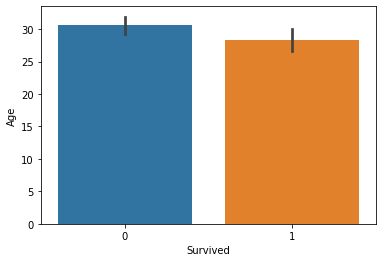

In [15]:
sns.barplot(x='Survived',y='Age',data=df)

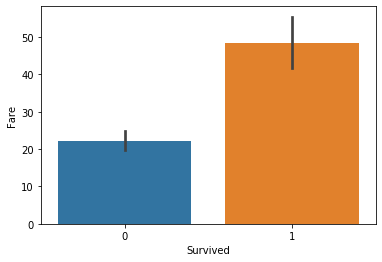

In [16]:
sns.barplot(x='Survived',y='Fare',data=df)

### Heat map

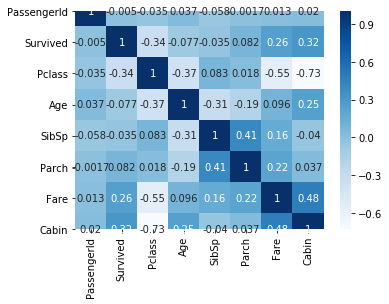

In [17]:
corr = df.corr()

sns.heatmap(corr,vmax=1,square=True,annot=True,cmap='Blues')

### Pivot table

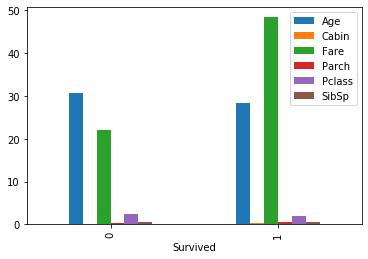

In [18]:
df.drop(['PassengerId'],axis='columns').pivot_table(index='Survived').plot.bar()

### Missing Values

In [19]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

In [20]:
males = df[df['Sex']=='male']
males.Age = males.Age.fillna(males.Age.mean())
males.isnull().sum()

C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [21]:
females = df[df['Sex']=='female']
females.Age = females.Age.fillna(females.Age.mean())
females.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [22]:
df1 = pd.concat([males,females],axis=0)
df1 = df1.sort_index(ascending=True)

In [23]:
df1 = df1.dropna()

In [24]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### Dealing with Outliers

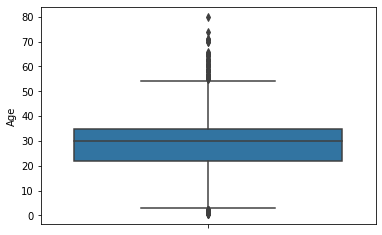

In [25]:
sns.boxplot(y='Age',data=df1)

In [26]:
df1.Age = df1['Age'].apply(lambda x: np.mean(df1['Age']) if (x>60) else x)

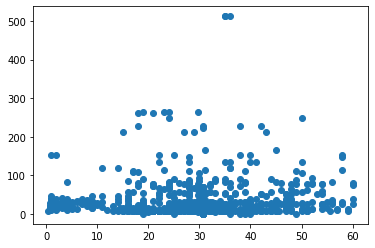

In [27]:
plt.scatter(x='Age',y='Fare',data=df1)
plt.show()

In [28]:
df1 = df1[df1['Fare']<300]

## Preparing training dataset

In [29]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [30]:
#Embarked
from sklearn.preprocessing import LabelEncoder
le_e = LabelEncoder()
df1['Embarked'] = le_e.fit_transform(df1['Embarked'])

In [31]:
#Sex
le_s = LabelEncoder()
df1['Sex'] = le_s.fit_transform(df1['Sex'])

In [32]:
df1.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [33]:
df1.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [34]:
#One hot encoding
dummies1 = pd.get_dummies(df1['Pclass'])
dummies2 = pd.get_dummies(df1['Parch'])
dummies3 = pd.get_dummies(df1['Embarked'])

In [35]:
x=[]
for i in range(len(df1)):
    x.append(0)
dummies2[9] = x

In [36]:
dummies2.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 9], dtype='int64')

In [37]:
df2 = df1.drop(['Pclass','Parch','Embarked'],axis='columns')
df2 = pd.concat([df2,dummies1.drop(dummies1.columns[0],axis='columns')],axis='columns')
df2 = pd.concat([df2,dummies2.drop([0],axis='columns')],axis='columns')
df2 = pd.concat([df2,dummies3.drop([0],axis='columns')],axis='columns')

In [38]:
df2.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Ticket,Fare,Cabin,2,3,1,2,3,4,5,6,9,1,2
0,1,0,"Braund, Mr. Owen Harris",1,22.0,1,A/5 21171,7.2500,0,0,1,0,0,0,0,0,0,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,PC 17599,71.2833,1,0,0,0,0,0,0,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,STON/O2. 3101282,7.9250,0,0,1,0,0,0,0,0,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,113803,53.1000,1,0,0,0,0,0,0,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",1,35.0,0,373450,8.0500,0,0,1,0,0,0,0,0,0,0,0,1


In [39]:
X = df2.drop(['PassengerId','Survived','Name','Ticket'],axis='columns')
X.head()

,Sex,Age,SibSp,Fare,Cabin,2,3,1,2,3,4,5,6,9,1,2
0,1,22.0,1,7.2500,0,0,1,0,0,0,0,0,0,0,0,1
1,0,38.0,1,71.2833,1,0,0,0,0,0,0,0,0,0,0,0
2,0,26.0,0,7.9250,0,0,1,0,0,0,0,0,0,0,0,1
3,0,35.0,1,53.1000,1,0,0,0,0,0,0,0,0,0,0,1
4,1,35.0,0,8.0500,0,0,1,0,0,0,0,0,0,0,0,1


In [40]:
y = df2['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [100]:
#Feature Scaleing
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
X

array([[ 0.73543835, -0.58398958,  0.42917961, ...,  0.        ,
        -0.30851132,  0.61300603],
       [-1.35973328,  0.7889628 ,  0.42917961, ...,  0.        ,
        -0.30851132, -1.63130531],
       [-1.35973328, -0.24075149, -0.476185  , ...,  0.        ,
        -0.30851132,  0.61300603],
       ...,
       [-1.35973328, -0.07636543,  0.42917961, ...,  0.        ,
        -0.30851132,  0.61300603],
       [ 0.73543835, -0.24075149, -0.476185  , ...,  0.        ,
        -0.30851132, -1.63130531],
       [ 0.73543835,  0.27410566, -0.476185  , ...,  0.        ,
         3.24137216, -1.63130531]])

In [42]:
# Test Train split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## Preparing Test dataset

In [43]:
#Loadind dataset
test = pd.read_csv('test.csv')

In [44]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [45]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [46]:
for i in range(len(test)):
    if pd.isnull(test['Age'][i]):
        if test['Sex'][i]=='male':
            test['Age'][i] = males.Age.mean()
        else :
            test['Age'][i] = females.Age.mean()
    if pd.isnull(test['Fare'][i]):
        test['Fare'][i] = test['Fare'].median()

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [47]:
test.Cabin = test.Cabin.fillna(0)
test.Cabin = test.Cabin.apply(lambda x: 1 if (x!=0) else x )

In [48]:
test.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [49]:
#Embarked
test['Embarked'] = le_e.fit_transform(test['Embarked'])

#Sex
test['Sex'] = le_s.fit_transform(test['Sex'])

In [50]:
#One hot encoding
dummies1t = pd.get_dummies(test['Pclass'])
dummies2t = pd.get_dummies(test['Parch'])
dummies3t = pd.get_dummies(test['Embarked'])

In [51]:
test = test.drop(['Pclass','Parch','Embarked'],axis='columns')
test = pd.concat([test,dummies1t.drop(dummies1t.columns[0],axis='columns')],axis='columns')
test = pd.concat([test,dummies2t.drop([0],axis='columns')],axis='columns')
test = pd.concat([test,dummies3t.drop([0],axis='columns')],axis='columns')

In [52]:
test.head()

,PassengerId,Name,Sex,Age,SibSp,Ticket,Fare,Cabin,2,3,1,2,3,4,5,6,9,1,2
0,892,"Kelly, Mr. James",1,34.5,0,330911,7.8292,0,0,1,0,0,0,0,0,0,0,1,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,363272,7.0000,0,0,1,0,0,0,0,0,0,0,0,1
2,894,"Myles, Mr. Thomas Francis",1,62.0,0,240276,9.6875,0,1,0,0,0,0,0,0,0,0,1,0
3,895,"Wirz, Mr. Albert",1,27.0,0,315154,8.6625,0,0,1,0,0,0,0,0,0,0,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,3101298,12.2875,0,0,1,1,0,0,0,0,0,0,0,1


In [53]:
test = test.drop(['PassengerId','Name','Ticket'],axis='columns')
test.head()

,Sex,Age,SibSp,Fare,Cabin,2,3,1,2,3,4,5,6,9,1,2
0,1,34.5,0,7.8292,0,0,1,0,0,0,0,0,0,0,1,0
1,0,47.0,1,7.0000,0,0,1,0,0,0,0,0,0,0,0,1
2,1,62.0,0,9.6875,0,1,0,0,0,0,0,0,0,0,1,0
3,1,27.0,0,8.6625,0,0,1,0,0,0,0,0,0,0,0,1
4,0,22.0,1,12.2875,0,0,1,1,0,0,0,0,0,0,0,1


In [54]:
#Feature Scaleing
test = sc_X.fit_transform(test)

## Classifier

### Logistic regression

In [55]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

Logistic regression accuracy: 0.843


In [57]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(logreg,X,y,cv=10)
scores.sort()
accuracy_log=scores.mean()
acc = {'LogisticRegression' : accuracy_log}
    
print(scores)
print(accuracy_log)

[0.78409091 0.78651685 0.78651685 0.79775281 0.80898876 0.80898876
 0.80898876 0.82022472 0.82954545 0.83908046]
0.8070694351496366


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

In [58]:
prediction_log= logreg.predict(X_test)

In [59]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, prediction_log) 
cm_lr

array([[99, 13],
       [15, 51]], dtype=int64)

Text(0.5, 1, 'log_model')

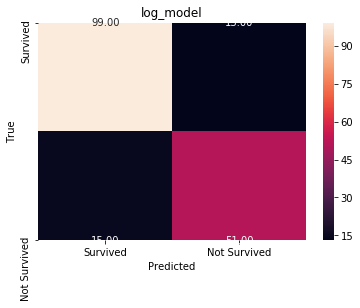

In [60]:
sns.heatmap(cm_lr, annot=True, fmt='.2f',xticklabels = ["Survived", "Not Survived"] , yticklabels = ["Survived", "Not Survived"] )
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title('log_model')

### Random forest 

In [61]:
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier()
rfm.fit(X_train, y_train)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [62]:
print('Random Forest accuracy: {:.3f}'.format(accuracy_score(y_test, rfm.predict(X_test))))

Random Forest accuracy: 0.803


In [63]:
scores=cross_val_score(rfm,X,y,cv=10)
scores.sort()
accuracy_rfm=scores.mean()
acc.update({'RandomForest': accuracy_rfm})
    
print(scores)
print(accuracy_rfm)

[0.71910112 0.74157303 0.76136364 0.76404494 0.79775281 0.80898876
 0.81609195 0.85227273 0.86516854 0.88764045]
0.8013997980580699


In [64]:
prediction_rfm= rfm.predict(X_test)

In [65]:
from sklearn.metrics import confusion_matrix
cm_rfm = confusion_matrix(y_test, prediction_rfm) 
cm_rfm

array([[97, 15],
       [20, 46]], dtype=int64)

Text(0.5, 1, 'rfm_model')

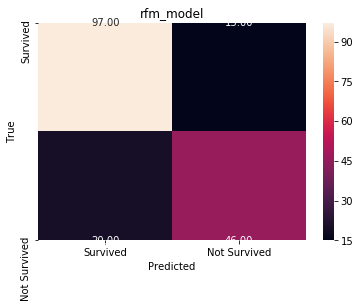

In [66]:
sns.heatmap(cm_rfm, annot=True, fmt='.2f',xticklabels = ["Survived", "Not Survived"] , yticklabels = ["Survived", "Not Survived"])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title('rfm_model')

### K Neighbors classifier

In [67]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors=20)
knnmodel.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [68]:
print('KNeighbors accuracy: {:.3f}'.format(accuracy_score(y_test, knnmodel.predict(X_test))))

KNeighbors accuracy: 0.826


In [69]:
scores=cross_val_score(knnmodel,X,y,cv=10)
scores.sort()
accuracy_knnmodel=scores.mean()
acc.update({'KNeighbors': accuracy_knnmodel})

print(scores)
print(accuracy_knnmodel)

[0.75280899 0.76136364 0.7752809  0.78651685 0.78651685 0.79775281
 0.8045977  0.80898876 0.82954545 0.84269663]
0.7946068589811326


In [70]:
prediction_knnmodel = knnmodel.predict(X_test)

In [71]:
cm_knnmodel = confusion_matrix(y_test, prediction_knnmodel) 
cm_knnmodel

array([[101,  11],
       [ 20,  46]], dtype=int64)

Text(0.5, 1, 'knn_model')

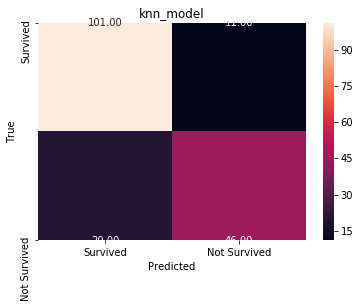

In [72]:
sns.heatmap(cm_knnmodel, annot=True, fmt='.2f',xticklabels = ["Survived", "Not Survived"] , yticklabels = ["Survived", "Not Survived"])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title('knn_model')

### Decision tree

In [73]:
from sklearn.tree import DecisionTreeClassifier 

dtree_model = DecisionTreeClassifier(max_depth = 8)
dtree_model.fit(X_train,y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [74]:
print('Decision Tree accuracy: {:.3f}'.format(accuracy_score(y_test, knnmodel.predict(X_test))))

Decision Tree accuracy: 0.826


In [75]:
scores=cross_val_score(dtree_model,X,y,cv=10)
scores.sort()
accuracy_dtree_model=scores.mean()
acc.update({'DecisionTree': accuracy_dtree_model})

print(scores)
print(accuracy_dtree_model)

[0.71910112 0.75280899 0.77272727 0.78651685 0.79775281 0.80898876
 0.81609195 0.82022472 0.82954545 0.85393258]
0.7957690523992345


In [76]:
prediction_dtree_model = dtree_model.predict(X_test)

In [77]:
cm_dtree_model = confusion_matrix(y_test, prediction_dtree_model) 
cm_dtree_model

array([[98, 14],
       [20, 46]], dtype=int64)

Text(0.5, 1, 'dtree_model')

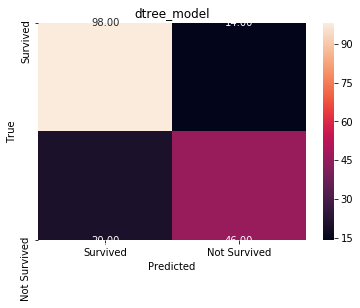

In [78]:
sns.heatmap(cm_dtree_model, annot=True, fmt='.2f',xticklabels = ["Survived", "Not Survived"] , yticklabels = ["Survived", "Not Survived"])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title('dtree_model')

### Support Vector Machine model

In [79]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf')
svm.fit(X_train,y_train)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [80]:
print('SVM accuracy: {:.3f}'.format(accuracy_score(y_test, svm.predict(X_test))))

SVM accuracy: 0.826


In [81]:
scores=cross_val_score(svm,X,y,cv=10)
scores.sort()
accuracy_svm=scores.mean()
acc.update({'SupportVectorMachine': accuracy_svm})
    
print(scores)
print(accuracy_svm)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\skle

[0.76136364 0.76404494 0.79775281 0.80898876 0.80898876 0.82022472
 0.83908046 0.84090909 0.84269663 0.86516854]
0.8149218355582167


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [82]:
prediction_svm = svm.predict(X_test)

In [83]:
cm_svm = confusion_matrix(y_test, prediction_svm) 
cm_svm

array([[102,  10],
       [ 21,  45]], dtype=int64)

Text(0.5, 1, 'svm')

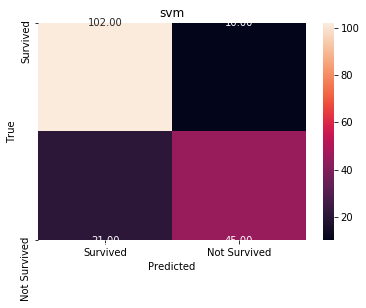

In [84]:
sns.heatmap(cm_svm, annot=True, fmt='.2f',xticklabels = ["Survived", "Not Survived"] , yticklabels = ["Survived", "Not Survived"])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title('svm')

### Gaussian Naive bayes classifier

In [85]:
from sklearn.naive_bayes import GaussianNB
gaussianmodel=  GaussianNB()
gaussianmodel.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [86]:
print('Gaussian Naive bayes accuracy: {:.3f}'.format(accuracy_score(y_test, gaussianmodel.predict(X_test))))

Gaussian Naive bayes accuracy: 0.399


In [87]:
scores=cross_val_score(gaussianmodel,X,y,cv=10)
scores.sort()
accuracy_gaussianmodel=scores.mean()
acc.update({'Gaussianmodel': accuracy_gaussianmodel})

print(scores)
print(accuracy_gaussianmodel)

[0.38202247 0.38202247 0.38636364 0.39325843 0.39772727 0.40449438
 0.40449438 0.40449438 0.40449438 0.4137931 ]
0.3973164911415589


In [88]:
prediction_gaussianmodel = gaussianmodel.predict(X_test)

In [89]:
cm_gaussianmodel = confusion_matrix(y_test, prediction_gaussianmodel) 
cm_gaussianmodel

array([[  5, 107],
       [  0,  66]], dtype=int64)

Text(0.5, 1, 'gaussianmodel')

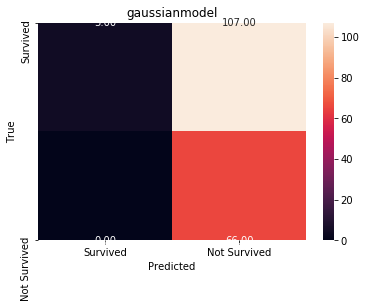

In [90]:
sns.heatmap(cm_gaussianmodel, annot=True, fmt='.2f',xticklabels = ["Survived", "Not Survived"] , yticklabels = ["Survived", "Not Survived"])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title('gaussianmodel')

### Accuracies of different models

In [91]:
#accuracy after cross validation
print(acc)

{'LogisticRegression': 0.8070694351496366, 'RandomForest': 0.8013997980580699, 'KNeighbors': 0.7946068589811326, 'DecisionTree': 0.7957690523992345, 'SupportVectorMachine': 0.8149218355582167, 'Gaussianmodel': 0.3973164911415589}


- Support Vector Machine has highest accuracy

In [92]:
final_prediction = svm.predict(test)

In [93]:
final_prediction

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [94]:
real = pd.read_csv('gender_submission.csv')
real.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [95]:
cm = confusion_matrix(real['Survived'],final_prediction)
cm

array([[259,   7],
       [ 36, 116]], dtype=int64)

In [96]:
acc_s = accuracy_score(real['Survived'],final_prediction)
acc_s

0.8971291866028708

Text(0.5, 1, 'Support Vector Machine')

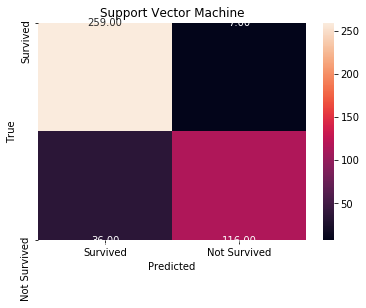

In [97]:
sns.heatmap(cm, annot=True, fmt='.2f',xticklabels = ["Survived", "Not Survived"] , yticklabels = ["Survived", "Not Survived"])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title('Support Vector Machine')

## Saving the model to disk

In [98]:
import pickle
filename = 'model.sav'
pickle.dump(svm,open(filename,'wb'))